In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import os
import re
sns.set()

In [2]:
# READ DATA FOR USER 1
root = './data/raw_yolo_u1/raw_data/'
files = os.listdir(root)
list_files_u1 = []
for i in range(len(files)):
    list_files_u1.append(root+files[i])  
#print list_files,len(list_files)
#print list_files_u1
print len(list_files_u1)

37139


In [3]:
# count the appearance of a unique tags for user 1
u1_data={}
threshold = 0.9 # this is the prob threshold
for i in range(len(list_files_u1)):
    #print list_files_u1[i]
    file= open(list_files_u1[i],'r+')
    txt = file.read()
    file.close()
    txt = txt.split('\n')
    N_lines= len(txt) #total number of lines in each txt file
    counter = 1   
    for line in txt:
        pattern = re.compile(r'[b]\w+(.jpg|\s\(\d\).jpg)')
        res = re.search(pattern,line)
        if res:
            data= res.group() 
            #print data
        else:
            if counter < N_lines: 
                items = line.split(': ')
                tag_name= items[0]
                perc =float(items[1][0:2])/100.0
                #print tag_name,perc
                if perc >= threshold: # select only tag names with a certain percentage threshold
                    if tag_name in u1_data:#check if key exist in dictionary
                        u1_data[tag_name]+=1
                    else:
                        u1_data[tag_name]=1
        counter +=1 
        
print u1_data,len(u1_data)

{'fork': 1, 'toilet': 2, 'cup': 16, 'car': 11, 'laptop': 312, 'clock': 1, 'bed': 3, 'person': 980, 'book': 36, 'zebra': 2, 'parking meter': 1, 'keyboard': 7, 'diningtable': 1, 'tvmonitor': 204, 'cell phone': 29, 'mouse': 3, 'chair': 11, 'refrigerator': 5} 18


In [4]:
# filter data when the nº of occurences is below a certain threshold (OPTIONAL)
u1_data_filter={}
for k,v in u1_data.items():
    if v >= 1 : # filter out only nº ocurrences large or equal than this value
        u1_data_filter[k]=v
print u1_data_filter,len(u1_data_filter)

{'fork': 1, 'toilet': 2, 'clock': 1, 'refrigerator': 5, 'car': 11, 'laptop': 312, 'cup': 16, 'bed': 3, 'person': 980, 'book': 36, 'zebra': 2, 'parking meter': 1, 'keyboard': 7, 'tvmonitor': 204, 'cell phone': 29, 'mouse': 3, 'chair': 11, 'diningtable': 1} 18


In [5]:
# organize the data from more accurences to less ocurrences
x1=[]
y1=[]
for w in sorted(u1_data_filter, key=u1_data_filter.get, reverse=True):
    x1.append(w)
    y1.append(u1_data[w])

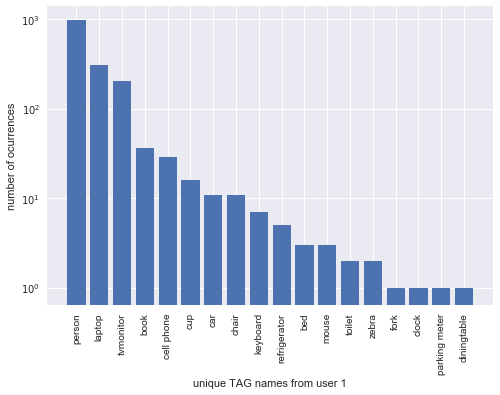

In [6]:
# BAR PLOT VISUALIZATION #
x_n = np.arange(len(x1))
plt.xticks(x_n, x1,rotation= 'vertical')
plt.bar(x_n, y1, log= True)
plt.xlabel('unique TAG names from user 1')
plt.ylabel('number of ocurrences')
plt.show()

In [7]:
root = './data/raw_yolo_u2/'
files = os.listdir(root)
list_files_u2 = []
for i in range(len(files)):
    list_files_u2.append(root+files[i])  
#print list_files,len(list_files)
print list_files_u2,len(list_files_u2)

['./data/raw_yolo_u2/2015-04-20_predict.txt', './data/raw_yolo_u2/2015-04-21_predict.txt', './data/raw_yolo_u2/2015-04-22_predict.txt', './data/raw_yolo_u2/2015-04-23_predict.txt', './data/raw_yolo_u2/u2_2015-04-24_predict.txt', './data/raw_yolo_u2/u2_2015-04-25_predict.txt', './data/raw_yolo_u2/u2_2015-04-26_2015-04-28_predict.txt', './data/raw_yolo_u2/u2_2015-04-29_05-01_predict.txt', './data/raw_yolo_u2/u2_2015-05-02_predict.txt', './data/raw_yolo_u2/u2_2015-05-03_predict.txt', './data/raw_yolo_u2/u2_2015-05-04_predict.txt', './data/raw_yolo_u2/u2_2015-05-05_2015-05-07_predict.txt', './data/raw_yolo_u2/u2_2015-05-08_2015-06-17_predict.txt', './data/raw_yolo_u2/u2_2015-06-18_2015-06-19_predict.txt', './data/raw_yolo_u2/u2_2015-06-20_2015-06-21_predict.txt'] 15


In [8]:
# count the appearance of a unique tag
u2_data={}
threshold = 0.9
for i in range(len(list_files_u2)):
    file= open(list_files_u2[i],'r+')
    txt = file.read()
    file.close()
    txt = txt.split('\n')
    N_lines= len(txt) #total number of lines in each txt file
    counter = 1   
    for line in txt:
        pattern = re.compile(r'[b]\w+(.jpg|\s\(\d\).jpg)')
        res = re.search(pattern,line)
        if res:
            data= res.group()            
        else:
            if counter < N_lines: 
                items = line.split(': ')
                tag_name= items[0]
                perc =float(items[1][0:2])/100.0
                if perc >= threshold: # select only tag names with a certain percentage threshold
                    if tag_name in u2_data:#check if key exist in dictionary
                        u2_data[tag_name]+=1
                    else:
                        u2_data[tag_name]=1
        counter +=1 
        
print u2_data,len(u2_data)

{'toilet': 2, 'diningtable': 5, 'umbrella': 1, 'cup': 13, 'car': 20, 'laptop': 560, 'bowl': 1, 'microwave': 3, 'cat': 1, 'person': 400, 'book': 4, 'bed': 2, 'aeroplane': 1, 'keyboard': 75, 'bus': 1, 'tvmonitor': 860, 'chair': 2, 'sofa': 1, 'cell phone': 12, 'refrigerator': 3, 'sink': 1} 21


In [9]:
# filter data when the nº of occurences is below a certain threshold
u2_data_filter={}
for k,v in u2_data.items():
    if v >= 1 : # filter out only nº ocurrences large or equal than this value
        u2_data_filter[k]=v
print u2_data_filter,len(u2_data_filter)

{'toilet': 2, 'umbrella': 1, 'cup': 13, 'refrigerator': 3, 'car': 20, 'laptop': 560, 'bowl': 1, 'microwave': 3, 'cat': 1, 'person': 400, 'book': 4, 'bed': 2, 'aeroplane': 1, 'keyboard': 75, 'bus': 1, 'tvmonitor': 860, 'chair': 2, 'sofa': 1, 'cell phone': 12, 'diningtable': 5, 'sink': 1} 21


there are 79 different tags for user 2

In [10]:
# organize the data from more accurences to less ocurrences
x2=[]
y2=[]
for w in sorted(u2_data_filter, key=u2_data_filter.get, reverse=True):
    x2.append(w)
    y2.append(u2_data[w])
print x2,len(x2)

['tvmonitor', 'laptop', 'person', 'keyboard', 'car', 'cup', 'cell phone', 'diningtable', 'book', 'refrigerator', 'microwave', 'toilet', 'bed', 'chair', 'umbrella', 'bowl', 'cat', 'aeroplane', 'bus', 'sofa', 'sink'] 21


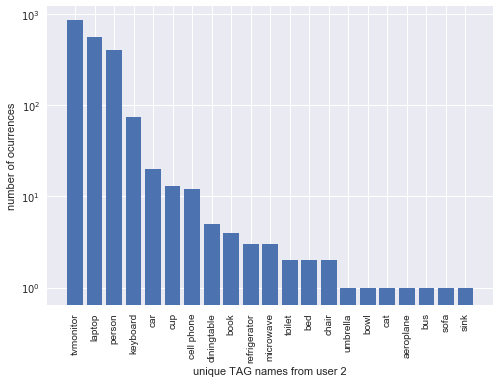

In [11]:
# BAR PLOT VISUALIZATION #
x_n = np.arange(len(x2))
plt.xticks(x_n, x2,rotation= 'vertical')
plt.bar(x_n, y2, log= True)
plt.xlabel('unique TAG names from user 2')
plt.ylabel('number of ocurrences')
plt.show()

./data//u2/2015-06-19/b00003338_21i7lf_20150619_092943e.jpg


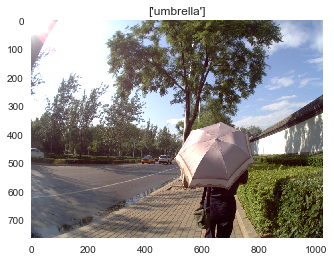

In [16]:
#find the images filename to look for a specific list of tags
tag_exep=['umbrella']
get_exceptions = []
root = './data/'
for files in list_files_u2:
    with open(files) as fichero:
        for line in fichero.readlines():
            stripped= line.split(': ')
            if 'D:/' in stripped[0]:
                date= stripped[0].split('/')[4].split('\\')[0]
                filename = stripped[0].split('/')[4].split('\\')[1]
                if len(date) > 10:
                    date= stripped[0].split('/')[4].split('\\')[1]
                    filename = stripped[0].split('/')[4].split('\\')[2]
            else:               
                tag= stripped[0]
                if tag in tag_exep:                    
                    perc =float(stripped[1][0:2])/100 
                    if perc >= threshold:
                        get_exceptions.append('/u2/'+date+'/'+filename)
                
                
            
%matplotlib inline
import random
root_file = './data/'
sample = random.choice(get_exceptions)
image_path = root_file + sample
print image_path
img = plt.imread(image_path)
plt.title(tag_exep)
plt.grid('off')
plt.imshow(img)

perform analysis for User3

In [18]:
root = './data/raw_yolo_u3/'
files = os.listdir(root)
list_files_u3 = []
for i in range(len(files)):
    list_files_u3.append(root+files[i])  
#print list_files_u3,len(list_files_u3)

# count the appearance of a unique tag
u3_data={}
threshold = 0.9
for i in range(len(list_files_u3)):
    file= open(list_files_u3[i],'r+')
    txt = file.read()
    file.close()
    txt = txt.split('\n')
    N_lines= len(txt) #total number of lines in each txt file
    counter = 1   
    for line in txt:
        pattern = re.compile(r'[b]\w+(.jpg|\s\(\d\).jpg)')
        res = re.search(pattern,line)
        if res:
            data= res.group()            
        else:
            if counter < N_lines: 
                items = line.split(': ')
                tag_name= items[0]
                perc =float(items[1][0:2])/100.0
                if perc >= threshold: # select only tag names with a certain percentage threshold
                    if tag_name in u3_data:#check if key exist in dictionary
                        u3_data[tag_name]+=1 # add ocurrence
                    else:
                        u3_data[tag_name]=1
        counter +=1 
        
print u3_data,len(u3_data)


{'umbrella': 1, 'cup': 4, 'car': 18, 'laptop': 29, 'bowl': 2, 'bed': 1, 'person': 437, 'train': 5, 'bus': 3, 'tvmonitor': 2, 'cell phone': 9, 'chair': 1, 'diningtable': 1} 13


In [19]:
# filter data when the nº of occurences is below a certain threshold
u3_data_filter={}
for k,v in u3_data.items():
    if v >= 1 : # filter out only nº ocurrences large or equal than this value
        u3_data_filter[k]=v
print u3_data_filter,len(u3_data_filter)

{'umbrella': 1, 'cup': 4, 'car': 18, 'laptop': 29, 'bowl': 2, 'bed': 1, 'person': 437, 'train': 5, 'bus': 3, 'tvmonitor': 2, 'cell phone': 9, 'chair': 1, 'diningtable': 1} 13


In [20]:
# organize the data from more accurences to less ocurrences
x3=[]
y3=[]
for w in sorted(u3_data_filter, key=u3_data_filter.get, reverse=True):
    x3.append(w)
    y3.append(u3_data[w])
print x3,len(x3)

['person', 'laptop', 'car', 'cell phone', 'train', 'cup', 'bus', 'bowl', 'tvmonitor', 'umbrella', 'bed', 'chair', 'diningtable'] 13


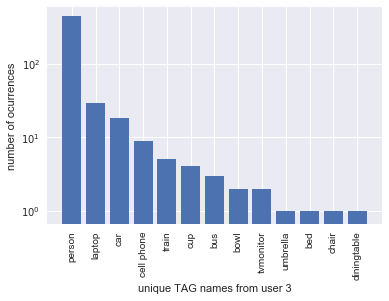

In [23]:
# BAR PLOT VISUALIZATION #
x_n = np.arange(len(x3))
plt.xticks(x_n, x3,rotation= 'vertical')
plt.bar(x_n, y3, log= True)
plt.xlabel('unique TAG names from user 3')
plt.ylabel('number of ocurrences')
plt.show()

there are 80 different TAGS for user 3

In [29]:
# MERGE ALL TAGS for ALL users and only get the unique ones 
# merge unique TAG for user u1,u2 and user 3
u_all= x1+x2+x3
u_tags =[]

for item in u_all:
    if item not in u_tags: # only add those tags not available before
        u_tags.append(item)
        
print u_tags
print len(u_tags)

['person', 'laptop', 'tvmonitor', 'book', 'cell phone', 'cup', 'car', 'chair', 'keyboard', 'refrigerator', 'bed', 'mouse', 'toilet', 'zebra', 'fork', 'clock', 'parking meter', 'diningtable', 'microwave', 'umbrella', 'bowl', 'cat', 'aeroplane', 'bus', 'sofa', 'sink', 'train']
27


In [30]:
tags_filter= ['person', 'laptop', 'tvmonitor', 'book', 'cell phone', 'cup', 'car', 'chair', 'keyboard', 'refrigerator', 'bed', 'mouse', 'toilet', 'zebra', 'fork', 'clock', 'parking meter', 'diningtable', 'microwave', 'umbrella', 'bowl', 'cat', 'aeroplane', 'bus', 'sofa', 'sink', 'train']

this is the list of ALL different TAGS available for ALL users

In [31]:
#build csv for user 1
root = './data/raw_yolo_u1/raw_data/'
files = os.listdir(root)
list_files_u1 = []
for i in range(len(files)):
    list_files_u1.append(root+files[i])  

users=[]
dates=[]
image_name=[]
results=[]
#for i in range(7):
for files in list_files_u1:
    with open(files) as fichero:
    #with open(list_files_u1[i]) as fichero:
        appeared_values=np.zeros(len(u_tags))
        #appeared_values[appeared_values == 0] = np.nan #replace zeros with a nan the first time
        for line in fichero.readlines():
            stripped= line.split(': ')
            if '/home' in stripped[0]:
                user =stripped[0].split('/')[5]
                date =stripped[0].split('/')[6]
                filename =stripped[0].split('/')[7]
                users.append(user)
                dates.append(date)
                image_name.append(filename)
                
            else:
                #print stripped
                tag=stripped[0]
                pred=float(stripped[1][:-2])/100.0
                #print tag,pred
                if tag in u_tags:
                    index=u_tags.index(tag) #locate index of the tag
                    if appeared_values[index]<pred: #asign new value if current one is higher
                        appeared_values[index]=pred
        results.append(appeared_values)# apend values


In [32]:
column_names = ['user', 'date','filename']
for i in u_tags:
    column_names.append(i)

In [37]:
# save results of user 1 in a csv
filename='./data/u1_data_filter.csv'
f=open(filename,'w+')
N = len(column_names)
for i,item in enumerate(column_names):
    if i !=(N-1):
        f.write(item+';')
    else:
        f.write(item)
f.write('\n')
    
for i in range(len(results)):
    #f.write(users[i])
    f.write(users[i]+','+dates[i]+','+image_name[i])
    for j in results[i]:
        f.write(';'+str(j))
    f.write('\n')
f.close()

In [ ]:
#build csv for user 2
root = './data/raw_yolo_u2/'
files = os.listdir(root)
list_files_u2 = []
for i in range(len(files)):
    list_files_u2.append(root+files[i])

users=[]
dates=[]
image_name=[]
results=[]
for files in list_files_u2:
    with open(files) as fichero:
        appeared_values=np.zeros(len(unique_tags_all))
        appeared_values[appeared_values == 0] = np.nan #replace zeros with a nan the first time
        for line in fichero.readlines():
            stripped= line.split(': ')
            if 'D:/' in stripped[0]:                
                user =stripped[0].split('/')[3]
                users.append(user)
                date =stripped[0].split('/')[4].split('\\')[0]
                filename =stripped[0].split('/')[4].split('\\')[1]
                if len(date) == 10:
                    date =stripped[0].split('/')[4].split('\\')[0]
                    filename =stripped[0].split('/')[4].split('\\')[1]
                    dates.append(date)
                    image_name.append(filename)
                else:
                    date =stripped[0].split('/')[4].split('\\')[1]
                    filename =stripped[0].split('/')[4].split('\\')[2]
                    dates.append(date)
                    image_name.append(filename)
                if np.isnan(appeared_values).any():  #check if its nan
                    appeared_values=np.zeros(len(unique_tags_all))# reset to zero
                else:
                    results.append(appeared_values)# apend values
                    appeared_values=np.zeros(len(unique_tags_all))# reset to zero
            else:
                tag=stripped[0]
                pred=float(stripped[1][:-3])/100.0
                #print tag,pred
                if tag in unique_tags_all:
                    index=unique_tags_all.index(tag)#locate index of the tag
                    if appeared_values[index]<pred: #asign new value if current is higher
                        appeared_values[index]=pred

                else: # if no tag is found set all values to zero
                    appeared_values=np.zeros(len(unique_tags_all))# reset to zero
        appeared_values=np.zeros(len(unique_tags_all))# reset to zero
        results.append(appeared_values)# apend values


In [ ]:
# save results of user 2 in a csv
filename='./data/u2_data.csv'
f=open(filename,'w+')
N = len(column_names)
for i,item in enumerate(column_names):
    if i !=(N-1):
        f.write(item+';')
    else:
        f.write(item)
f.write('\n')

for i in range(len(results)):
    f.write(users[i]+','+dates[i]+','+image_name[i])
    for j in results[i]:
        f.write(';'+str(j))
    f.write('\n')
f.close()


In [ ]:
#build csv for user 3
root = './data/raw_yolo_u3/'
files = os.listdir(root)
list_files_u3 = []
for i in range(len(files)):
    list_files_u3.append(root+files[i])

users=[]
dates=[]
image_name=[]
results=[]
for files in list_files_u3:
    with open(files) as fichero:
        appeared_values=np.zeros(len(unique_tags_all))
        appeared_values[appeared_values == 0] = np.nan #replace zeros with a nan the first time
        for line in fichero.readlines():
            stripped= line.split(': ')
            if 'D:/' in stripped[0]:                
                user =stripped[0].split('/')[3]
                users.append(user)
                date =stripped[0].split('/')[4].split('\\')[0]
                filename =stripped[0].split('/')[4].split('\\')[1]
                if len(date) == 10:
                    date =stripped[0].split('/')[4].split('\\')[0]
                    filename =stripped[0].split('/')[4].split('\\')[1]
                    dates.append(date)
                    image_name.append(filename)
                else:
                    date =stripped[0].split('/')[4].split('\\')[1]
                    filename =stripped[0].split('/')[4].split('\\')[2]
                    dates.append(date)
                    image_name.append(filename)
                if np.isnan(appeared_values).any():  #check if its nan
                    appeared_values=np.zeros(len(unique_tags_all))# reset to zero
                else:
                    results.append(appeared_values)# apend values
                    appeared_values=np.zeros(len(unique_tags_all))# reset to zero
            else:
                tag=stripped[0]
                pred=float(stripped[1][:-3])/100.0
                #print tag,pred
                if tag in unique_tags_all:
                    index=unique_tags_all.index(tag)#locate index of the tag
                    if appeared_values[index]<pred: #asign new value if current is higher
                        appeared_values[index]=pred

                else: # if no tag is found set all values to zero
                    appeared_values=np.zeros(len(unique_tags_all))# reset to zero
        appeared_values=np.zeros(len(unique_tags_all))# reset to zero
        results.append(appeared_values)# apend values


In [ ]:
# save results of user 3 in a csv
filename='./data/u3_data.csv'
f=open(filename,'w+')
N = len(column_names)
for i,item in enumerate(column_names):
    if i !=(N-1):
        f.write(item+';')
    else:
        f.write(item)
f.write('\n')

for i in range(len(results)):
    f.write(users[i]+','+dates[i]+','+image_name[i])
    for j in results[i]:
        f.write(';'+str(j))
    f.write('\n')
f.close()

EOF

We have succesfully generate 3 csv based on YOLO data